### Dataset

The problem is to optimize advertising, it means to select the best ad to show which will generates more clicks and hopelly more people purchase the product or contract a service.

The dataset has 10 ads (in columns) representing landscapes to inviting people to go on vacation. Every row has 1's and 0's, 1 when a user has clicked on the ad then there is a 1. In real world, this simulate a online process, going to down we need to figure out on the fly the best ad. In a nutshell the dataset is a simulation...

# Thomson sampling

## Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Read dataset

In [3]:
DATASET_URL = "../../../../datasets/ml_az_course/010_Ads_CTR_ClickThroughRate_Optimisation.csv"

In [4]:
dataset = pd.read_csv(DATASET_URL)
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


## Algorithm

In [5]:
import random

**Beta distribution**

![](./assets/beta_distributions.gif)


 the beta distribution is a family of continuous probability distributions defined on the interval [0, 1] in terms of two positive parameters, denoted by alpha (α) and beta (β), that appear as exponents of the variable and its complement to 1, respectively, and control the shape of the distribution.

In [7]:
number_rounds = dataset.shape[0]
number_ads = dataset.shape[1]

ads_selected = []
num_rewards_1 = [0] * number_ads
num_rewards_0 = [0] * number_ads
total_reward = 0

for round, row in dataset.iterrows():
    best_ad = -1
    max_random_beta = 0

    for j in range(number_ads):
        random_beta = random.betavariate(
            alpha=num_rewards_1[j] + 1,
            beta=num_rewards_0[j] + 1,
        )

        if max_random_beta <= random_beta:
            max_random_beta = random_beta
            best_ad = j

    ads_selected.append(best_ad)
    reward = row[f"Ad {best_ad + 1}"]

    if reward == 1:
        num_rewards_1[best_ad] += 1
    else:
        num_rewards_0[best_ad] += 1

    total_reward += reward


## Visualising the results

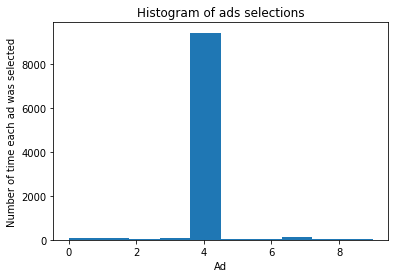

In [8]:
plt.hist(x=ads_selected)
plt.title(label="Histogram of ads selections")
plt.xlabel("Ad")
plt.ylabel("Number of time each ad was selected")
plt.show()

In [9]:
total_reward # is Thomson sampling better? Yes, the UCB got 2178

2603

**Note**: To know if the algorithm is able to identify the best ad, we can try with lower number of rounds, apparently UCB can't identify the best ad in 500 rounds but Thomson sampling.

### Plot beta distributions

In [10]:
from scipy.stats import beta

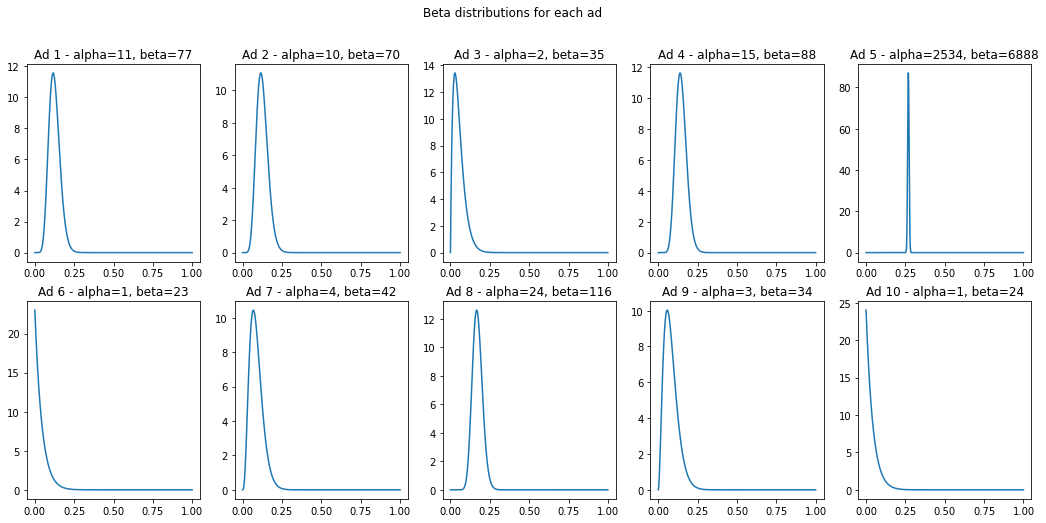

In [12]:
# Generate x-values for the plots
x = np.linspace(0, 1, 500) # generate 500 equidistant points between 0 and 1


# Create a figure with multiple subplots
fig, axis = plt.subplots(
    nrows=2, ncols=number_ads // 2, figsize=(18, 8)
)

for i in range(2):
    start = i * 5
    lim = start + 5
    for idx_j, j in enumerate(range(start, lim)):
        ax = axis[i][idx_j]
        a = max(1, num_rewards_1[j])
        b = max(1, num_rewards_0[j])
        beta_dist = beta(a, b)
        y = beta_dist.pdf(x)
        ax.plot(x, y)
        ax.set_title(f"Ad {j + 1} - alpha={a}, beta={b}")


fig.suptitle(t="Beta distributions for each ad")

plt.show()